In [1]:
import xarray as xr

ds_GFD_info = xr.open_dataset(
    "outputs/GreenSurge_Tonga_info_updated.nc",
    decode_times=False,
)
ds_GFD_info

<xarray.Dataset> Size: 4MB
Dimensions:                            (element_computation_index: 151076,
                                        triangle_forcing_nodes: 3,
                                        node_forcing_index: 20,
                                        element_forcing_index: 25,
                                        wind_direction_index: 24,
                                        time_forcing_index: 4,
                                        node_cumputation_index: 76754)
Coordinates:
  * wind_direction_index               (wind_direction_index) int32 96B 0 ... 23
  * time_forcing_index                 (time_forcing_index) float64 32B 0.0 ....
    node_computation_longitude         (node_cumputation_index) float64 614kB ...
    node_computation_latitude          (node_cumputation_index) float64 614kB ...
    triangle_nodes                     (triangle_forcing_nodes) int32 12B ...
  * node_forcing_index                 (node_forcing_index) int32 80B 0 1 ... 19
  * element_forcing_index              (element_forcing_index) int32 100B 0 ....
  * node_cumputation_index             (node_cumputation_index) int32 307kB 0...
  * element_computation_index          (element_computation_index) int32 604kB ...
Dimensions without coordinates: triangle_forcing_nodes
Data variables: (12/14)
    triangle_computation_connectivity  (element_computation_index, triangle_forcing_nodes) int32 2MB ...
    node_forcing_longitude             (node_forcing_index) float64 160B ...
    node_forcing_latitude              (node_forcing_index) float64 160B ...
    triangle_forcing_connectivity      (element_forcing_index, triangle_forcing_nodes) int32 300B ...
    wind_directions                    (wind_direction_index) int32 96B ...
    total_elements                     int32 4B ...
    ...                                 ...
    wind_speed                         int32 4B ...
    location_name                      object 8B ...
    eddy_viscosity                     int32 4B ...
    chezy_coefficient                  int32 4B ...
    reference_date                     object 8B ...
    forcing_time_step                  float64 8B ...
Attributes:
    title:        Hybrid Simulation Input Dataset
    description:  Structured dataset containing simulation parameters for hyb...
    created:      2025-05-31 15:29:42
    institution:  GeoOcean
    model:        GreenSurge

In [2]:
TCname = "HAROLD2020"
figsize = (6, 5)
instant = [130, 160, 180]

xds_GS_wind =xr.open_dataset(f"outputs/GreenSurge_wind_setup_{TCname}.nc")

ds_WL_dynamic_WindSetUp = xr.open_dataset(
    "inputs/GreenSurge_GFDcase_map.nc"
)

<div style="border: 1px solid #cce5ff; background-color: #e9f7fe; padding: 15px; border-radius: 6px; font-family: sans-serif;">
  <strong>🔹 Model validation</strong><br><br>

  The figures below show the maps of a given time and the swath maps of wind setup resulting from dynamic simulations with the Shallow Water Equation (SWE) model Delft3DFM (left panels) and from the GreenSurge aproach (right panels). These figures illustrate the importance of the wind setup in shallow water areas close to shore and de acuracy of the GreenSurge approach compared to dynamic simulations.
</div>

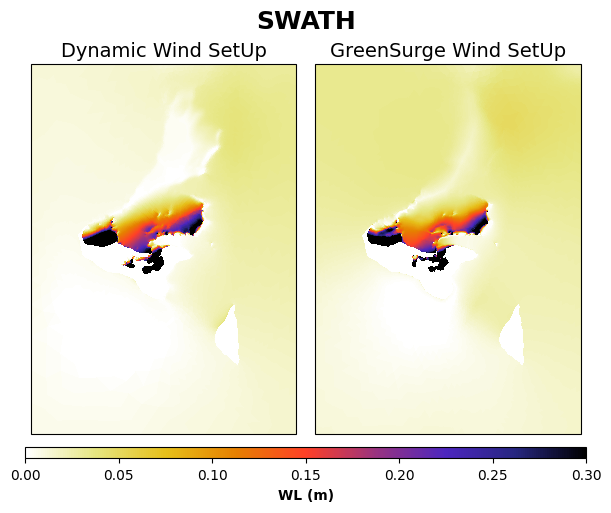

In [3]:
from bluemath_tk.additive.greensurge import plot_GS_vs_dynamic_windsetup_swath

plot_GS_vs_dynamic_windsetup_swath(
    ds_WL_GS_WindSetUp = xds_GS_wind, ds_WL_dynamic_WindSetUp = ds_WL_dynamic_WindSetUp, ds_gfd_metadata = ds_GFD_info, vmin=0, vmax=0.3, figsize=figsize,
)

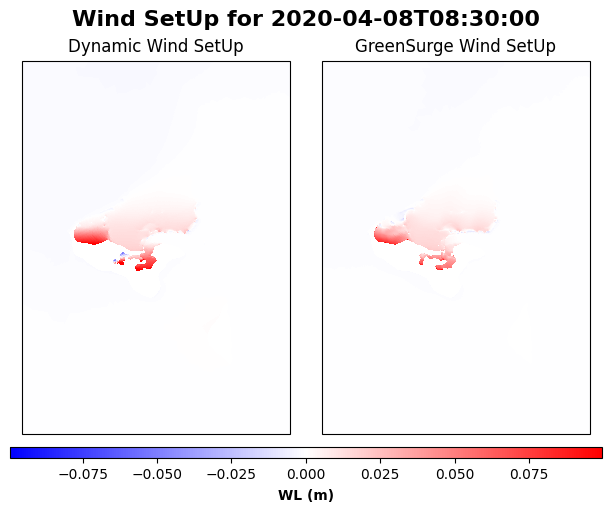

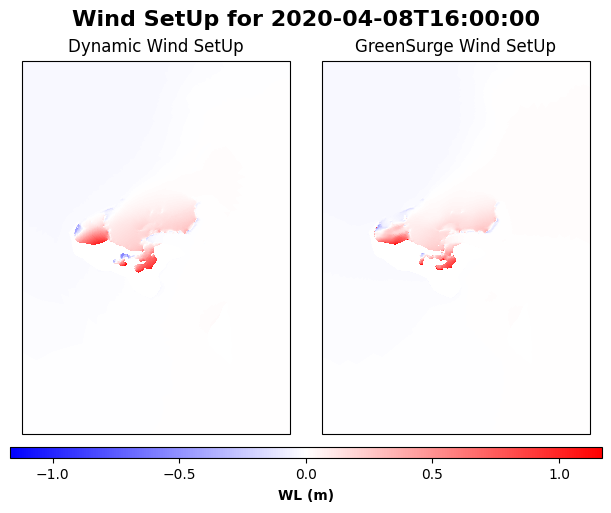

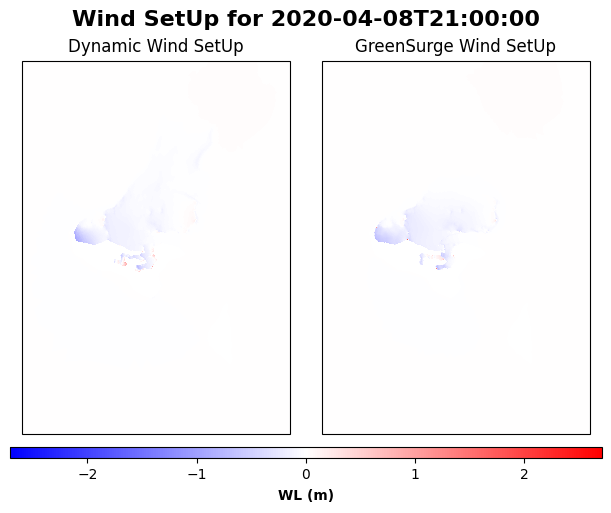

In [4]:
from bluemath_tk.additive.greensurge import plot_GS_vs_dynamic_windsetup

for i in instant:
    plot_GS_vs_dynamic_windsetup(
        ds_WL_GS_WindSetUp = xds_GS_wind,
        ds_WL_dynamic_WindSetUp = ds_WL_dynamic_WindSetUp,
        ds_gfd_metadata = ds_GFD_info,
        time = ds_WL_dynamic_WindSetUp.time[i].values,
        figsize = figsize,
    )

<div style="border: 1px solid #cce5ff; background-color: #e9f7fe; padding: 15px; border-radius: 6px; font-family: sans-serif;">
  <strong>🔹 Inverse Barometer</strong><br><br>

  The third stage for any TC event study consist of turning pressure differences into sea level rises and falls using IB methodology which take into account the correlation 1mb-1cm.
</div>


In [5]:
from bluemath_tk.additive.greensurge import pressure_to_IB

xds_vortex_GS = xr.open_dataset(
    f"outputs/GreenSurge_vortex_{TCname}.nc",
)

ds_WL_GS_IB = pressure_to_IB(xds_presure = xds_vortex_GS)

<div style="border: 1px solid #cce5ff; background-color: #e9f7fe; padding: 15px; border-radius: 6px; font-family: sans-serif;">
  <strong>🔹 Storm Surge</strong><br><br>

  Finally the fourth stage sums both components, the wind setup and the pressure-induced sea level changes, to obtain the storm surge.
  $$
  \eta_{SS} = \eta_{WindSetUp} + \eta_{IB}
  $$

</div>

<div style="border: 1px solid #cce5ff; background-color: #e9f7fe; padding: 15px; border-radius: 6px; font-family: sans-serif;">
  <strong>🔹 Model validation</strong><br><br>

  The panel below shows timeseries comparison of windsetup at three given locations. These figures illustrate the acuracy of Greensurge approach compared to dynamic simulations.
</div>

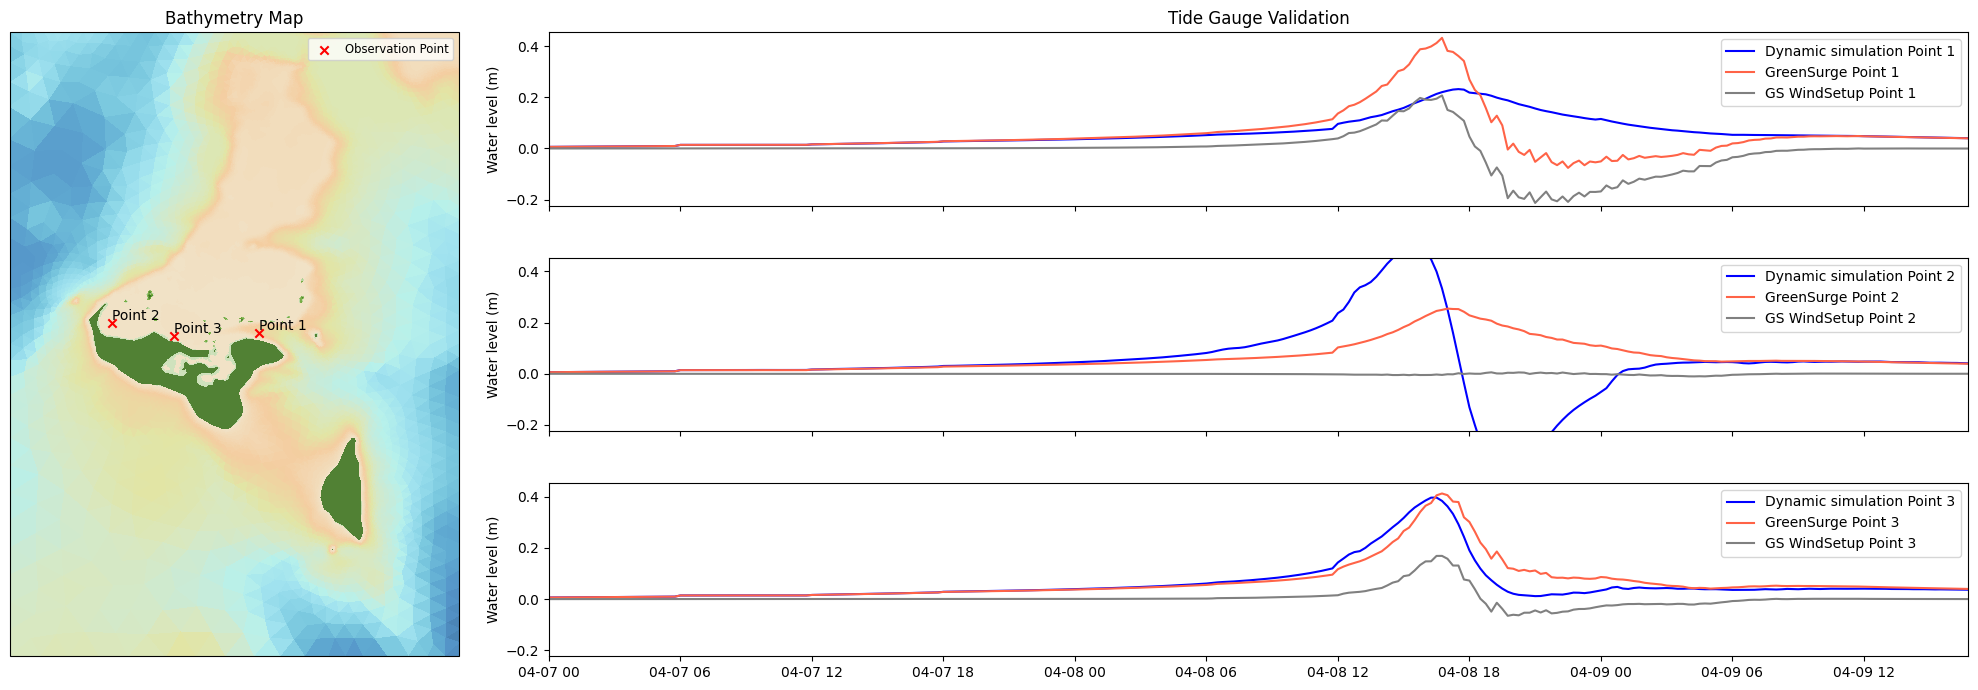

In [6]:
from bluemath_tk.additive.greensurge import plot_GS_validation_timeseries

plot_GS_validation_timeseries(
    ds_WL_GS_WindSetUp = xds_GS_wind,
    ds_WL_GS_IB = ds_WL_GS_IB,
    ds_WL_dynamic_WindSetUp = ds_WL_dynamic_WindSetUp,
    ds_GFD_info = ds_GFD_info,
    lon_obs = [-175.075, -175.316, -175.214],
    lat_obs = [-21.115, -21.098, -21.119],
)

<div style="border: 1px solid #cce5ff; background-color: #e9f7fe; padding: 15px; border-radius: 6px; font-family: sans-serif;">
  <strong>🔹 Model validation</strong><br><br>
  The panel below shows the GreenSurge validation using Tidal Gauge data. This timeseries comparison reveals the good approximation achieved using the GreenSurge approach.

</div>

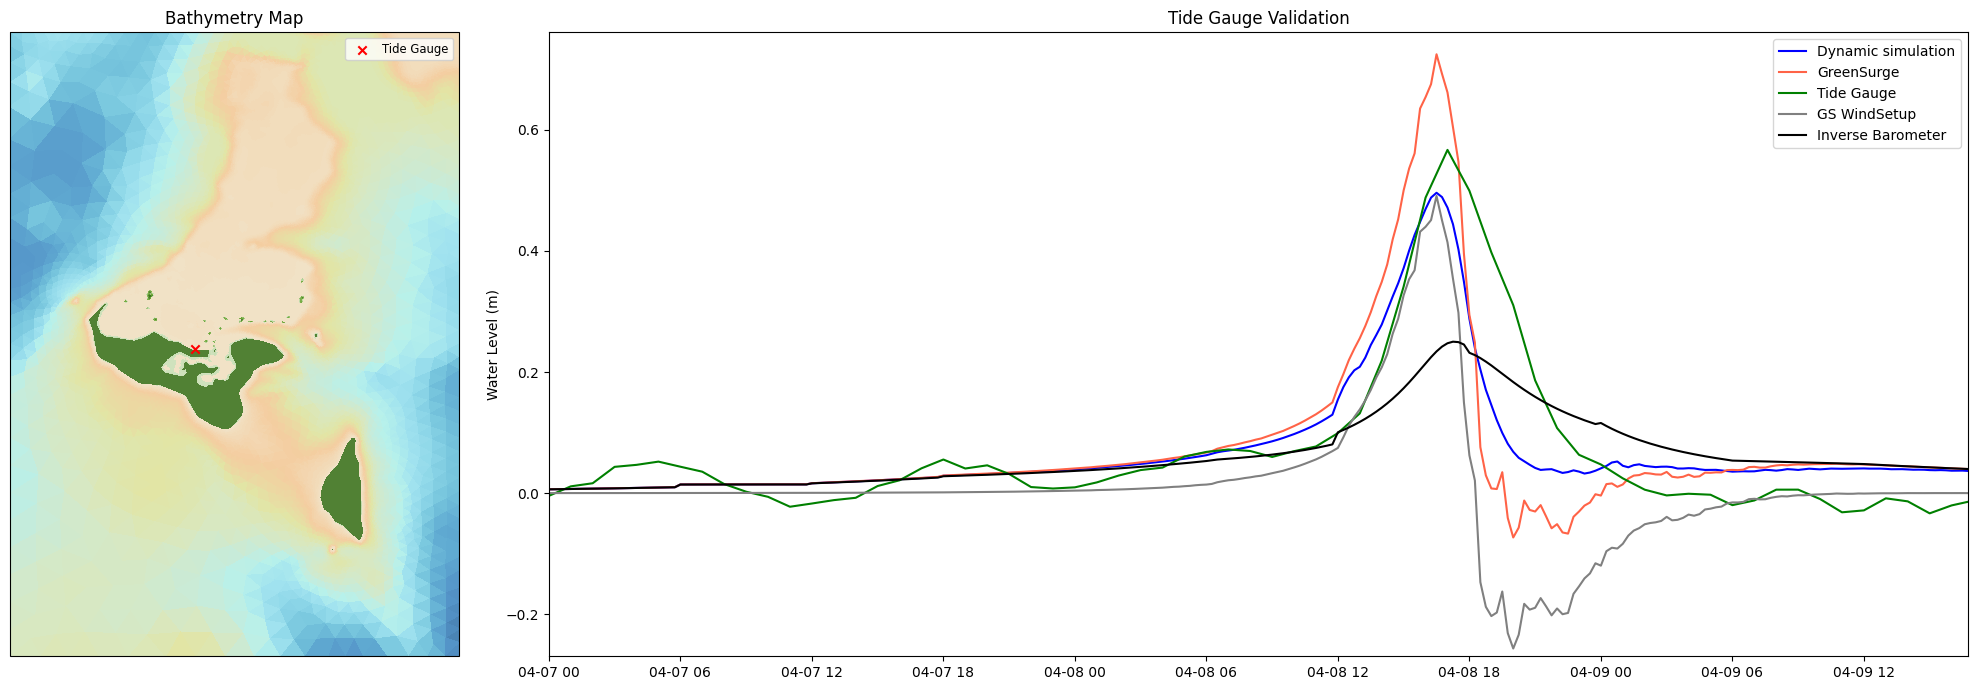

In [7]:
from bluemath_tk.additive.greensurge import plot_GS_TG_validation_timeseries

tide_gauge = xr.open_dataset(
    "inputs/TG_HAROLD2020_Tongatapu.nc"
)

plot_GS_TG_validation_timeseries(
    ds_WL_GS_WindSetUp = xds_GS_wind,
    ds_WL_GS_IB = ds_WL_GS_IB,
    ds_WL_dynamic_WindSetUp = ds_WL_dynamic_WindSetUp,
    tide_gauge = tide_gauge,
    ds_GFD_info = ds_GFD_info,
)